In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
df_train = pd.read_csv("src/train.csv")
df_test = pd.read_csv("src/test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OverallQual       765 non-null    int64
 1   YearBuilt         765 non-null    int64
 2   YearRemodAdd      765 non-null    int64
 3   TotalBsmtSF       765 non-null    int64
 4   1stFlrSF          765 non-null    int64
 5   GrLivArea         765 non-null    int64
 6   FullBath          765 non-null    int64
 7   TotRmsAbvGrd      765 non-null    int64
 8   GarageCars        765 non-null    int64
 9   GarageArea        765 non-null    int64
 10  SalePrice         765 non-null    int64
 11  ExterQual_TA      765 non-null    int64
 12  Foundation_PConc  765 non-null    int64
 13  KitchenQual_TA    765 non-null    int64
dtypes: int64(14)
memory usage: 83.8 KB


### **Dataframe Audit**

In [4]:
# NaN Values
df_train.isna().sum()

OverallQual         0
YearBuilt           0
YearRemodAdd        0
TotalBsmtSF         0
1stFlrSF            0
GrLivArea           0
FullBath            0
TotRmsAbvGrd        0
GarageCars          0
GarageArea          0
SalePrice           0
ExterQual_TA        0
Foundation_PConc    0
KitchenQual_TA      0
dtype: int64

In [5]:
# Duplicate Values
f"duplicate values : {df_train.duplicated().sum()} "

'duplicate values : 0 '

### **Data Analysis**
1.  Univariate Analysis
2.  Bivariate Analysis
3.  Correlation Analysis

In [6]:
df_train.head(3)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1
2,5,1910,2006,1022,1022,1022,1,4,1,280,85000,1,0,1


#### **Univariate Analysis**
1.  Descriptive 
2.  Normality test => shapiro
3.  Visualization => Boxplot, Swarmplot, Violin plot

##### Descriptive

In [7]:
# Descriptive Statistics

df_train.describe().loc[['min','max','mean','50%','25%','75%','std']].round(1)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
min,2.0,1880.0,1950.0,190.0,438.0,438.0,0.0,3.0,1.0,160.0,40000.0,0.0,0.0,0.0
max,10.0,2009.0,2010.0,6110.0,4692.0,5642.0,3.0,12.0,4.0,1418.0,755000.0,1.0,1.0,1.0
mean,6.3,1972.2,1986.1,1095.6,1169.4,1540.6,1.6,6.6,1.9,500.3,187929.4,0.6,0.5,0.5
50%,6.0,1976.0,1995.0,1008.0,1090.0,1477.0,2.0,6.0,2.0,484.0,167000.0,1.0,0.0,0.0
25%,5.0,1953.0,1968.0,808.0,879.0,1164.0,1.0,6.0,1.0,352.0,132000.0,0.0,0.0,0.0
75%,7.0,2003.0,2005.0,1324.0,1392.0,1776.0,2.0,7.0,2.0,595.0,223500.0,1.0,1.0,1.0
std,1.4,31.5,20.8,434.6,400.0,545.2,0.6,1.6,0.7,191.2,86855.6,0.5,0.5,0.5


##### Normality Test

In [8]:
# Normality test
from scipy.stats import shapiro, kstest 

results = []

for col in df_train.columns:
    stat, p = shapiro(df_train[col])
    normality = "Not Normal" if p < 0.05 else "Normal"

    stat2, p2 = kstest(df_train[col], 'norm', args=(df_train[col].mean(), df_train[col].std() ) )
    normality2 = "Not normal" if p2 < 0.05 else "Normal"

    results.append({"Col":col, 
                    "ShapiroStat": round(stat,4), 
                    "Shapiro-p-value": f"{p:.2e}", 
                    "Shapiro-Normality": normality,
                    "KolmogorovStat": round(stat2,4),
                    "Kolmogorvpval": f"{p2:.2e}",
                    "Kolmogorovnormal": normality2
                    })

normality_df = pd.DataFrame(results)
normality_df

,Col,ShapiroStat,Shapiro-p-value,Shapiro-Normality,KolmogorovStat,Kolmogorvpval,Kolmogorovnormal
0,OverallQual,0.9420,1.05e-16,Not Normal,0.1561,9.59e-17,Not normal
1,YearBuilt,0.9070,3.46e-21,Not Normal,0.1473,5.92e-15,Not normal
2,YearRemodAdd,0.8423,7.26e-27,Not Normal,0.1913,5.28e-25,Not normal
3,TotalBsmtSF,0.8556,7.23e-26,Not Normal,0.0892,9.43e-06,Not normal
4,1stFlrSF,0.9103,7.98e-21,Not Normal,0.0917,4.83e-06,Not normal
5,GrLivArea,0.8925,1.13e-22,Not Normal,0.0897,8.40e-06,Not normal
6,FullBath,0.7335,3.13e-33,Not Normal,0.3286,4.62e-74,Not normal
7,TotRmsAbvGrd,0.9332,5.41e-18,Not Normal,0.1756,4.17e-21,Not normal
8,GarageCars,0.7942,5.26e-30,Not Normal,0.2939,4.75e-59,Not normal
9,GarageArea,0.9604,1.60e-13,Not Normal,0.0795,1.18e-04,Not normal


##### Visualization

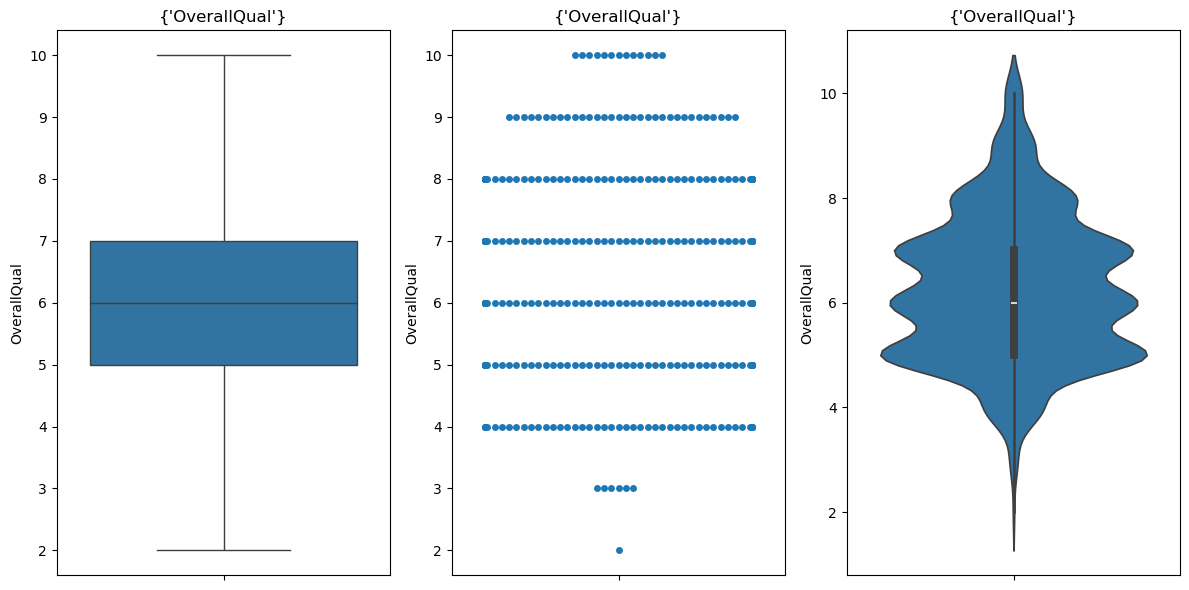

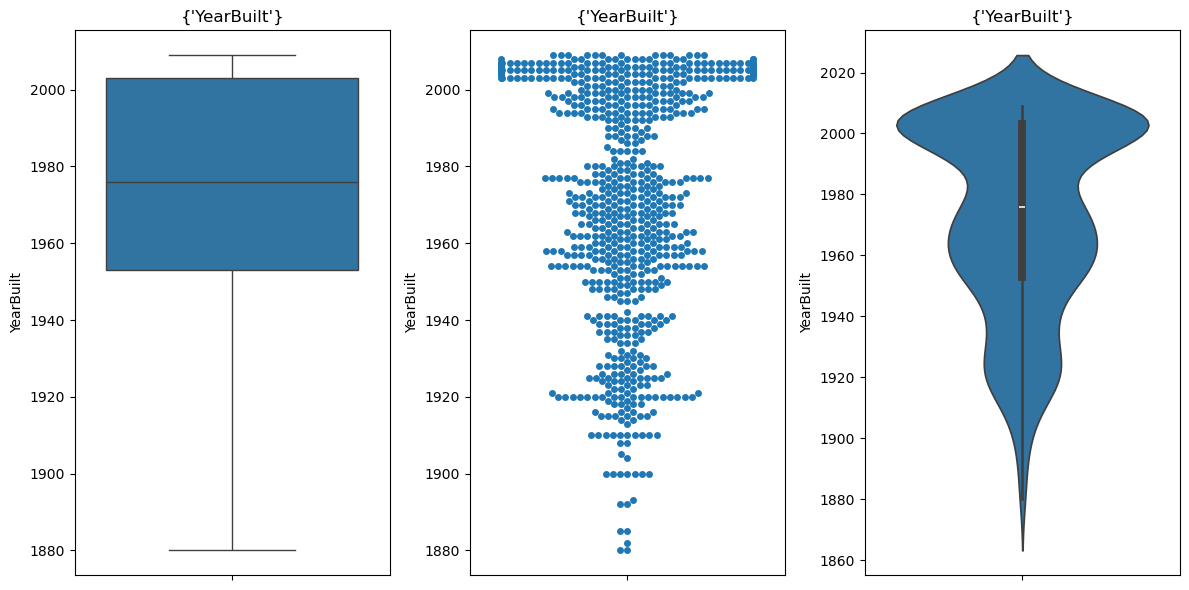

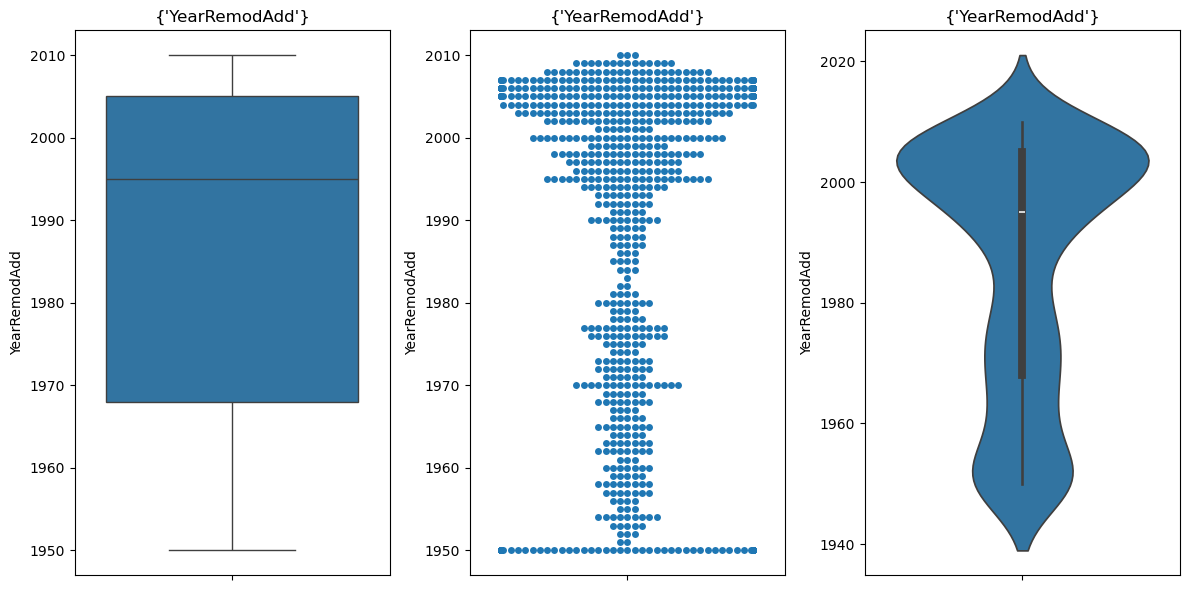

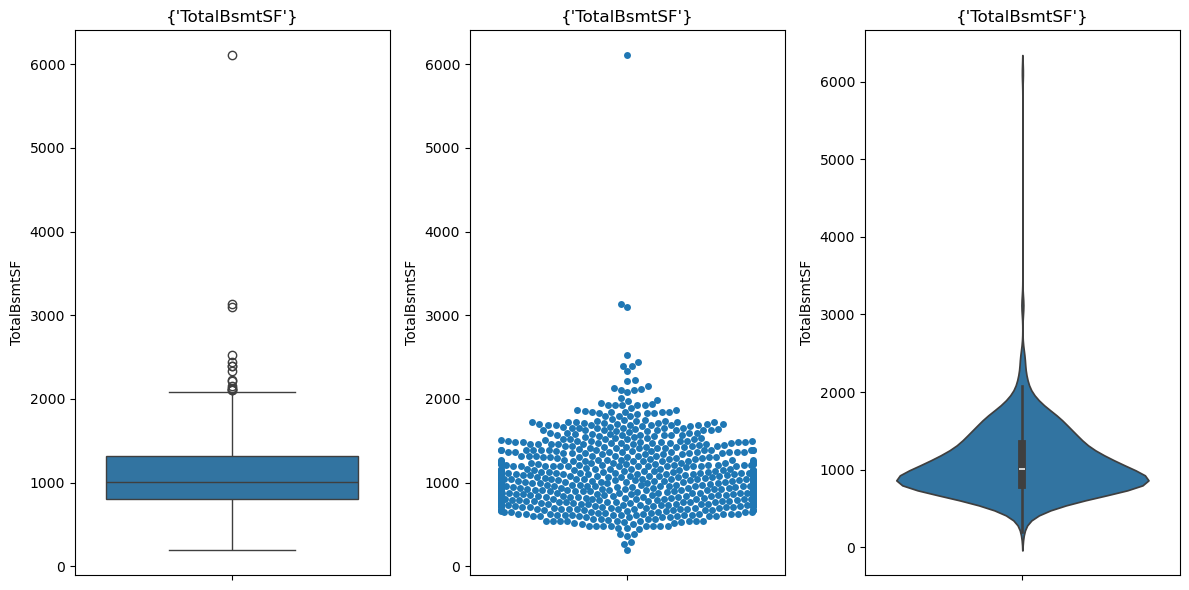

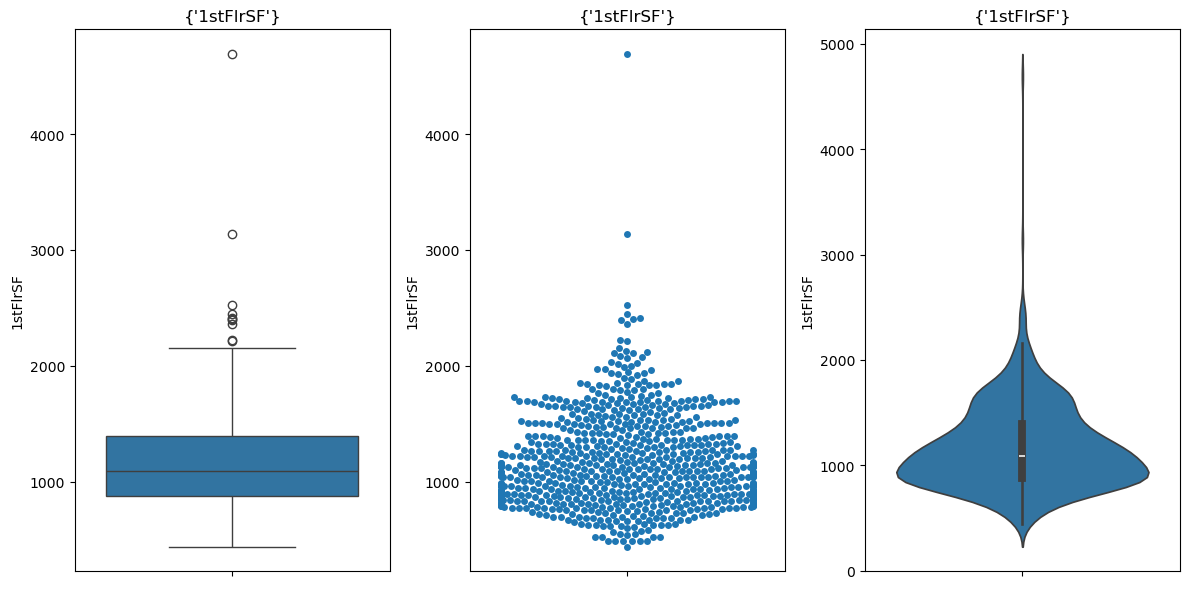

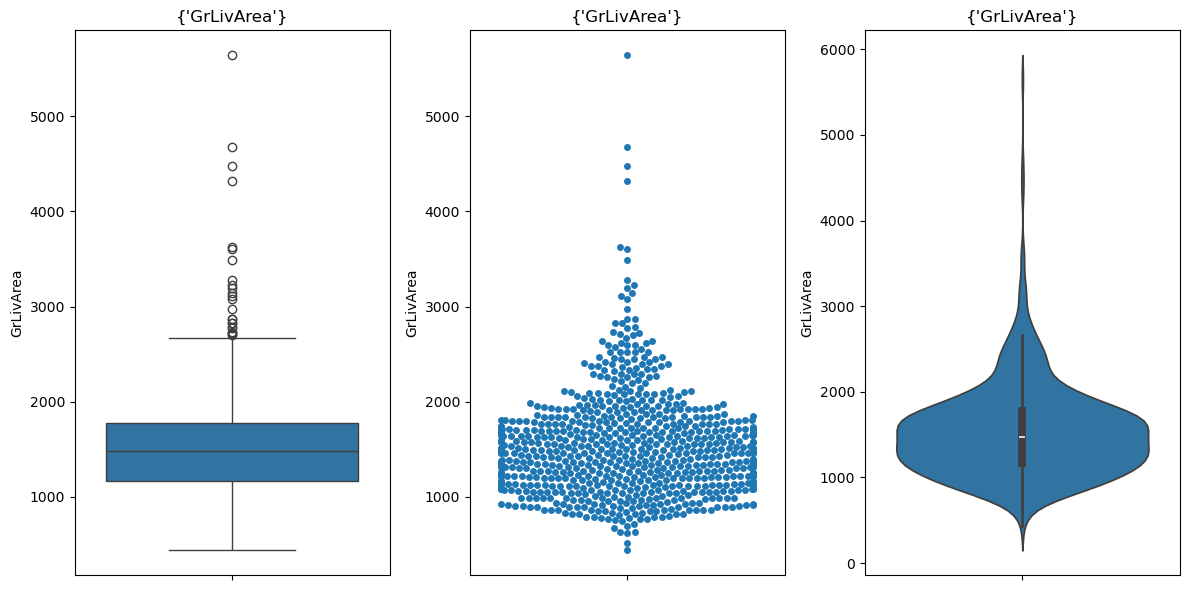

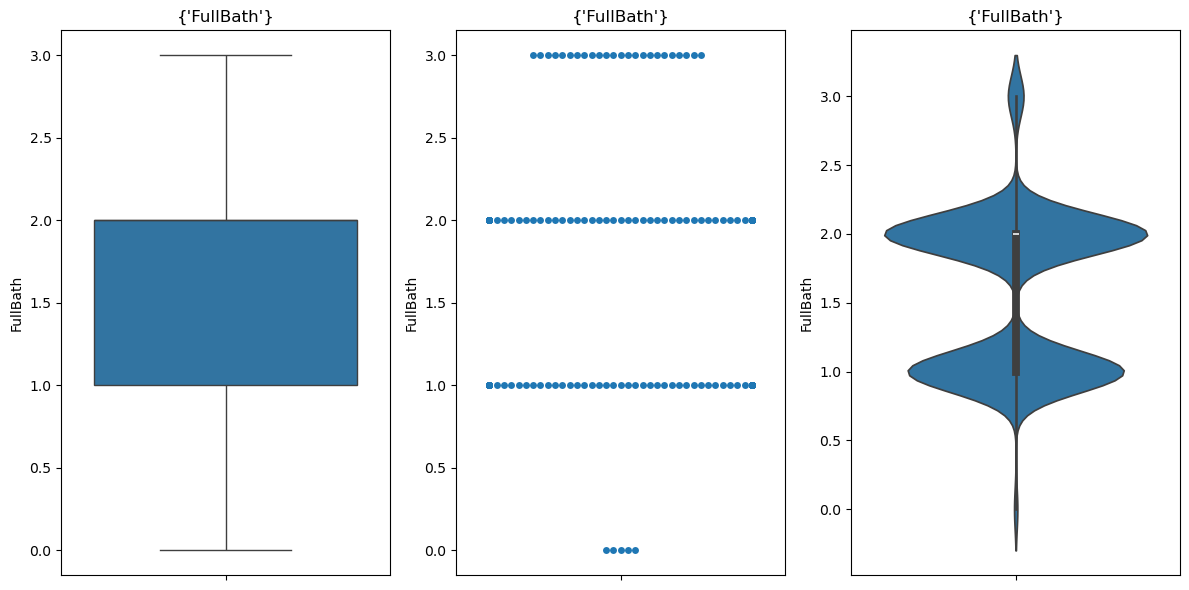

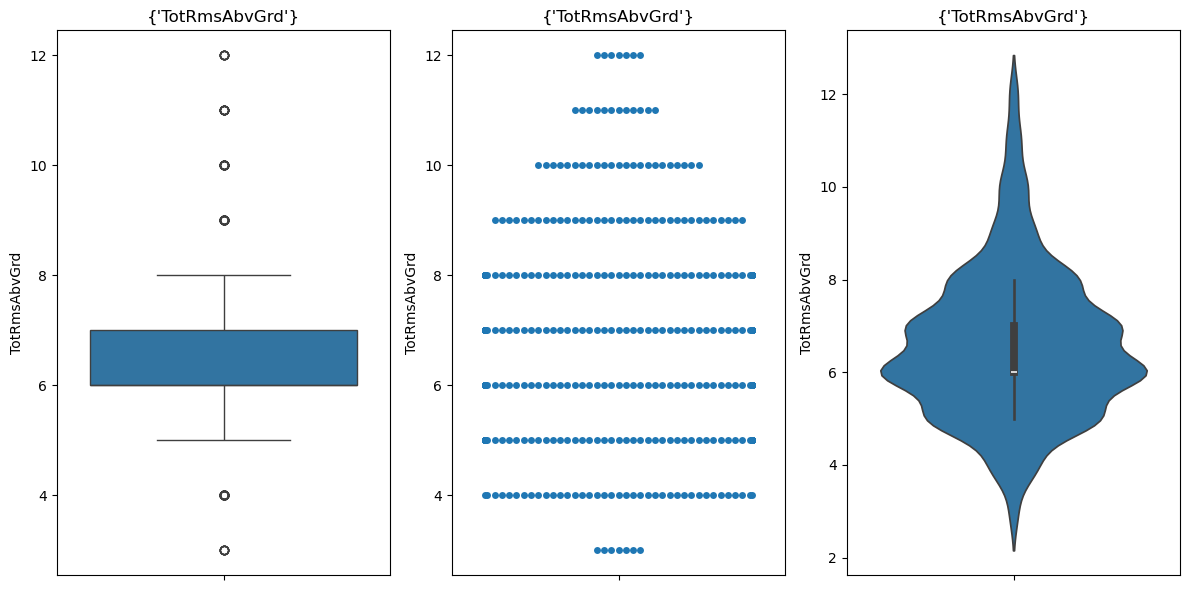

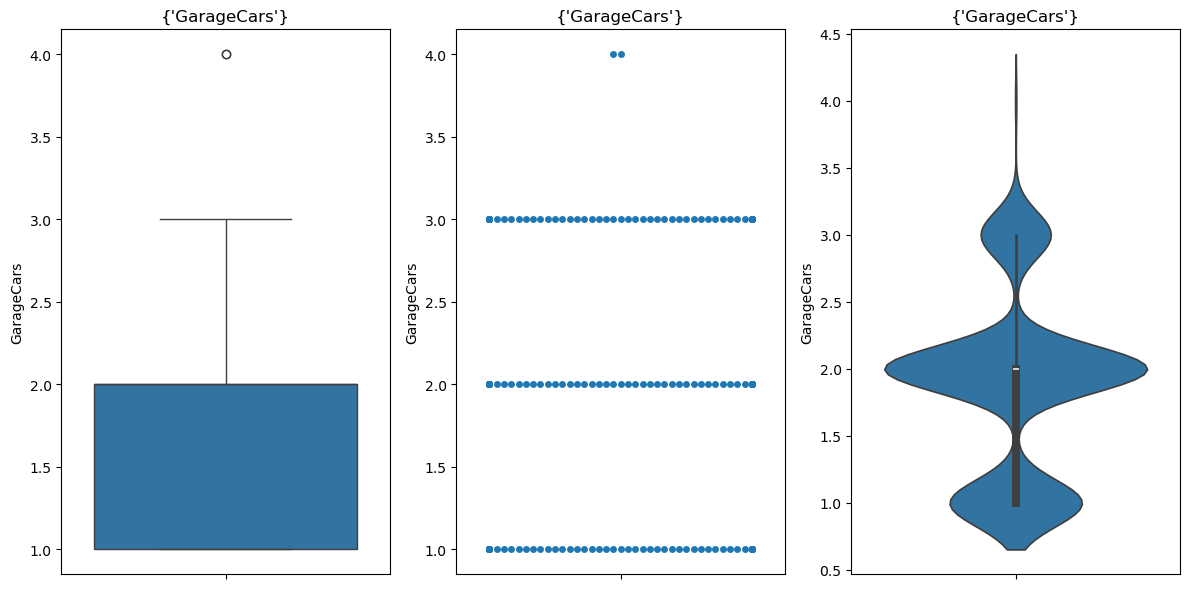

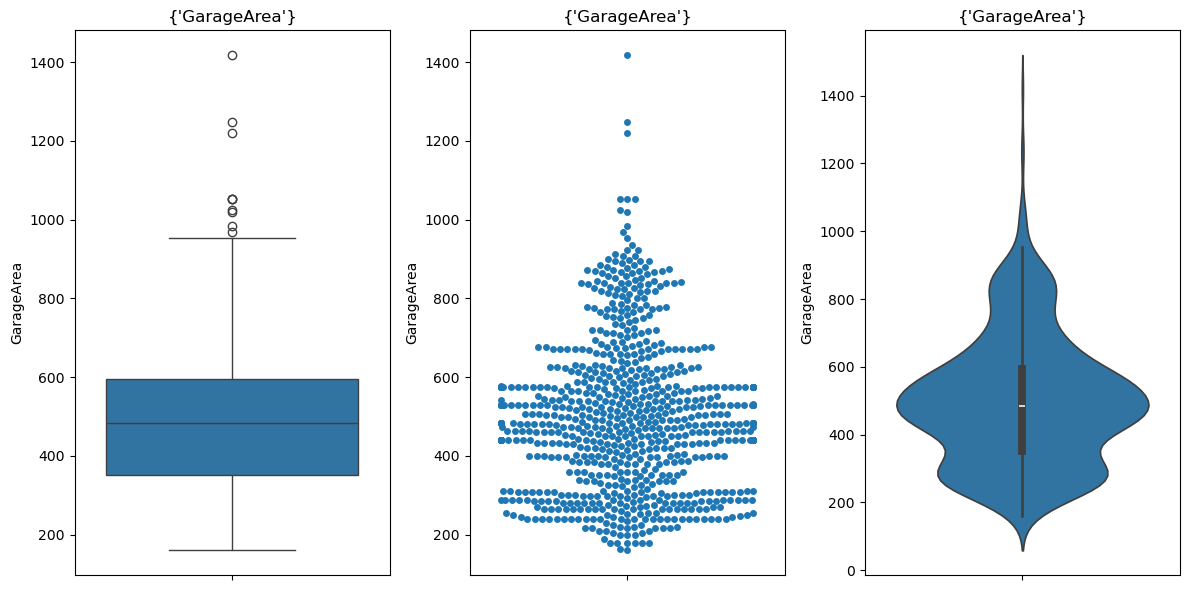

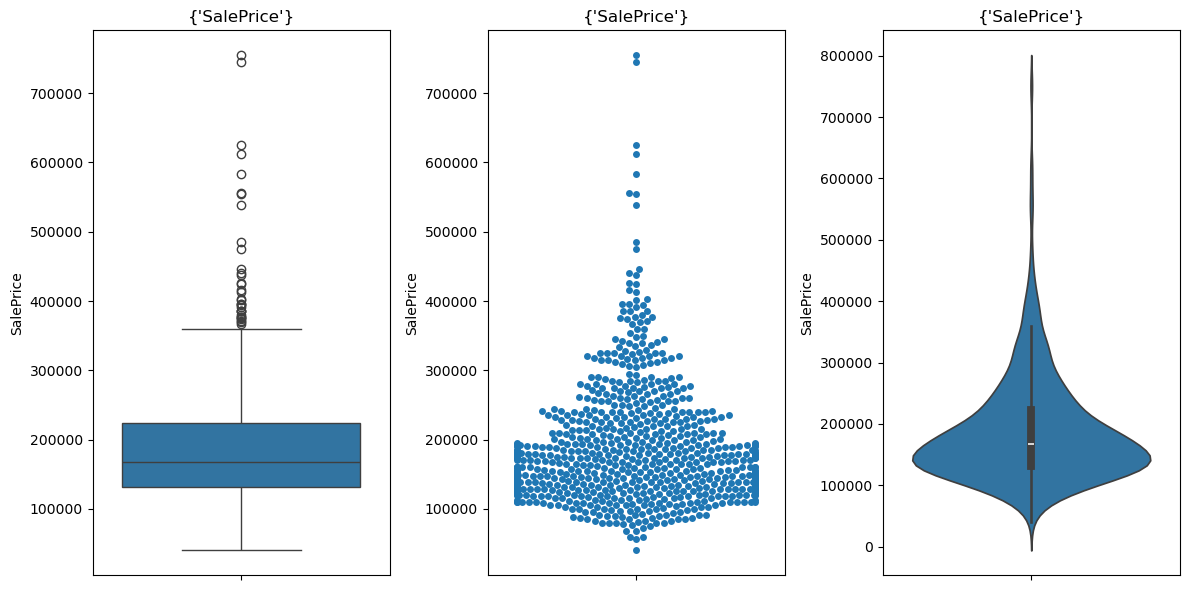

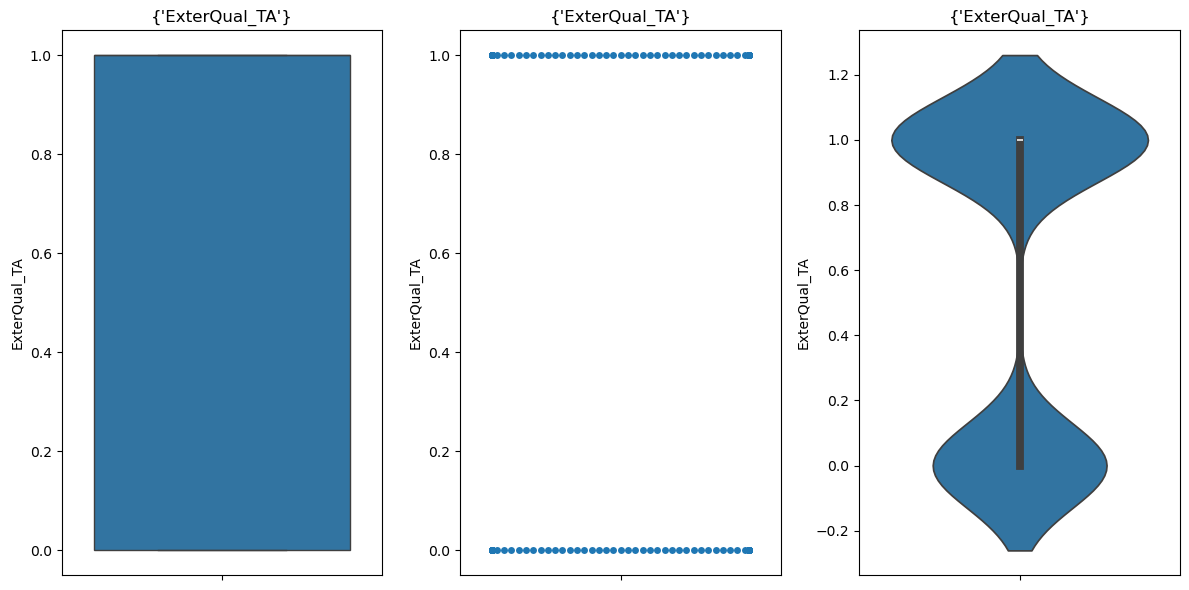

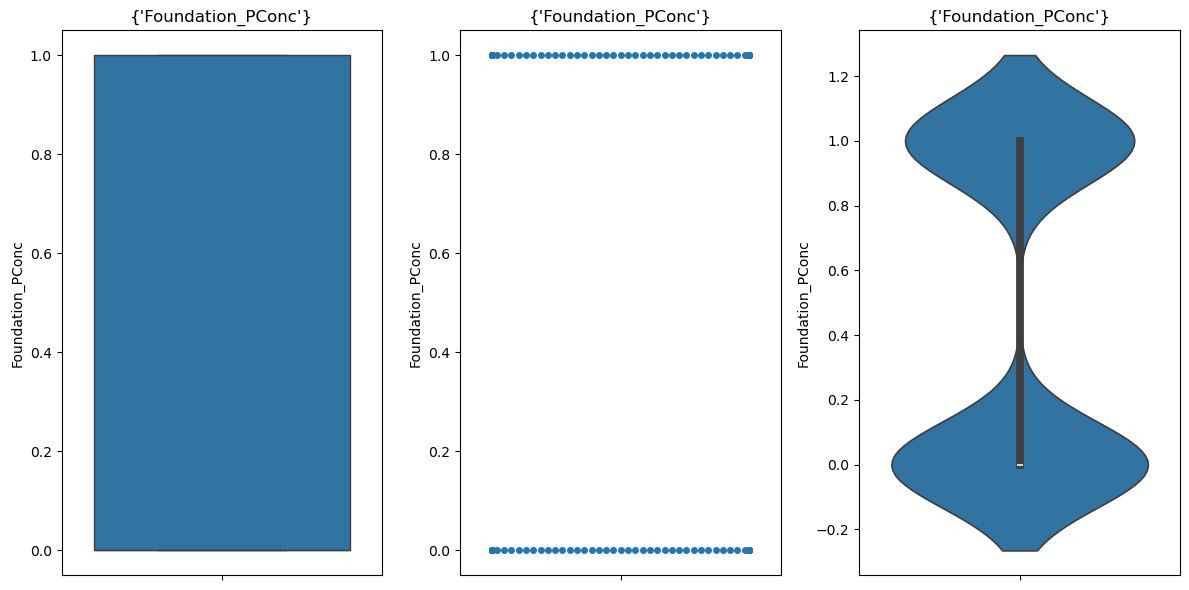

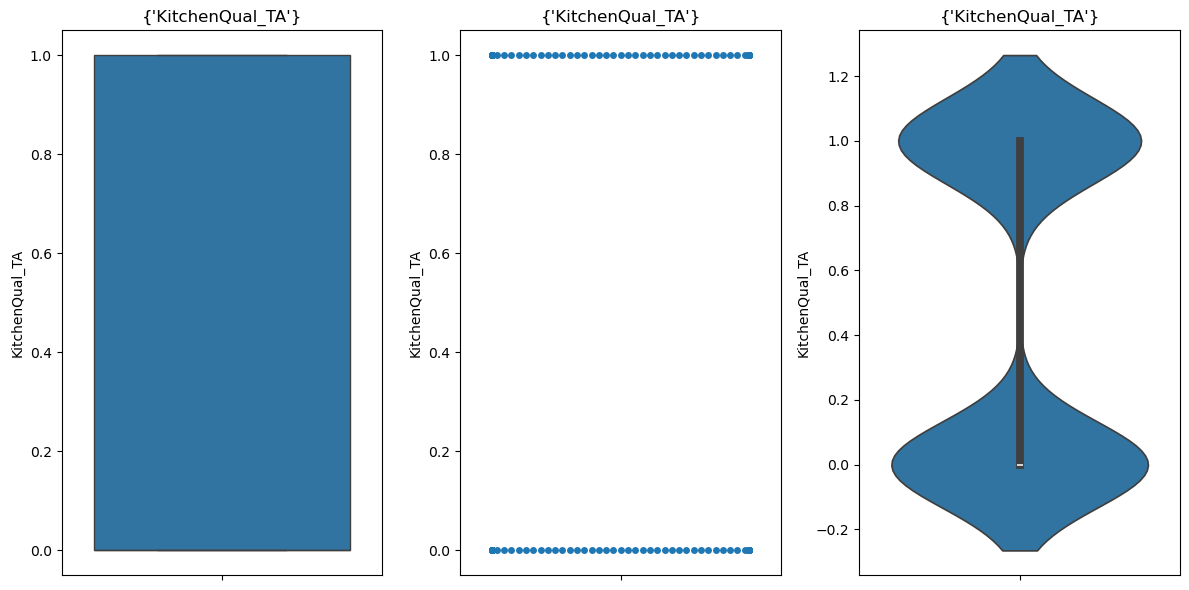

In [9]:
# BoxPlot & Swarm plot & Violin plot

for col in df_train.columns:
    fig, axes = plt.subplots(1,3,figsize=(12,6))

    
    sns.boxplot(data=df_train, y=col, ax=axes[0])
    axes[0].set_title({col})

    sns.swarmplot(data=df_train, y=col, ax=axes[1])
    axes[1].set_title({col})

    sns.violinplot(data=df_train, y=col, ax=axes[2])
    axes[2].set_title({col})

    plt.tight_layout()
    plt.show()


#### **Bivariate Analysis**
1. Pairplot with scatter & hist
2. Correlation 
3. Correlation with Targets

##### Pairplot

14


<Figure size 1200x1200 with 0 Axes>

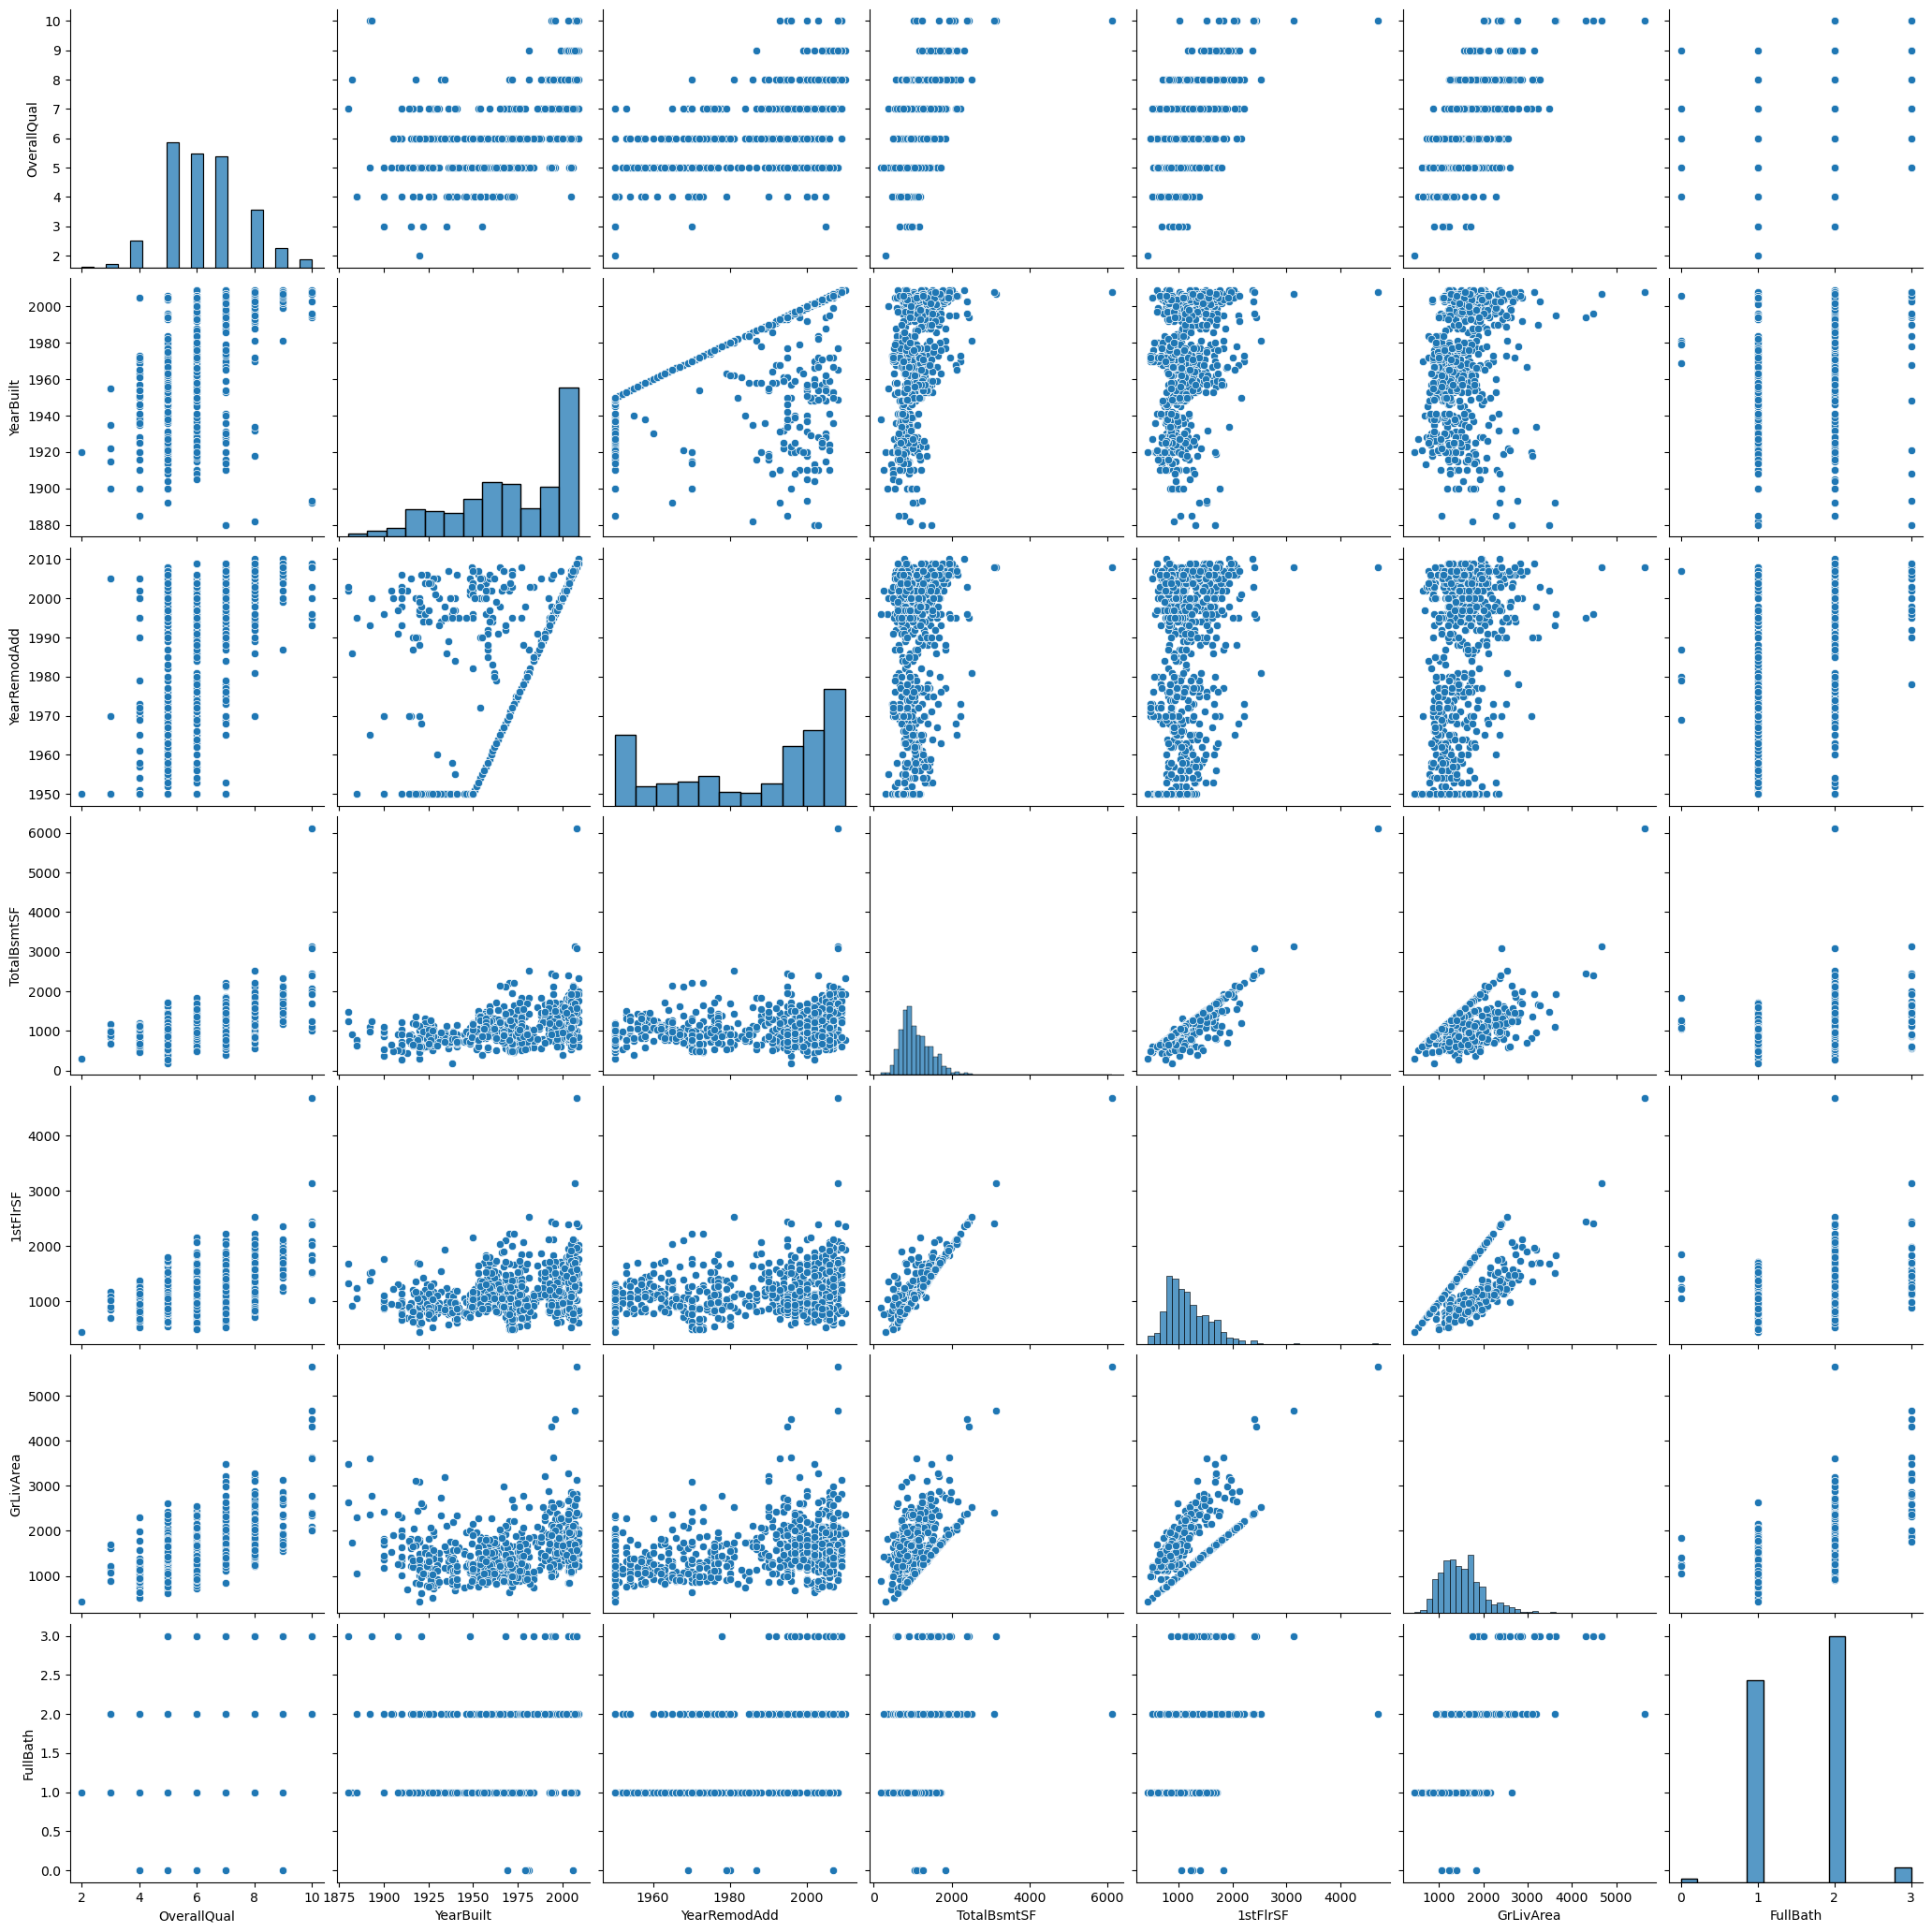

In [10]:
# sns pairplot scatterplot
print(len(df_train.columns))
plt.figure(figsize=(12,12))

sns.pairplot(data=df_train.iloc[:,:7], height=3)

plt.show()

<Figure size 1200x1200 with 0 Axes>

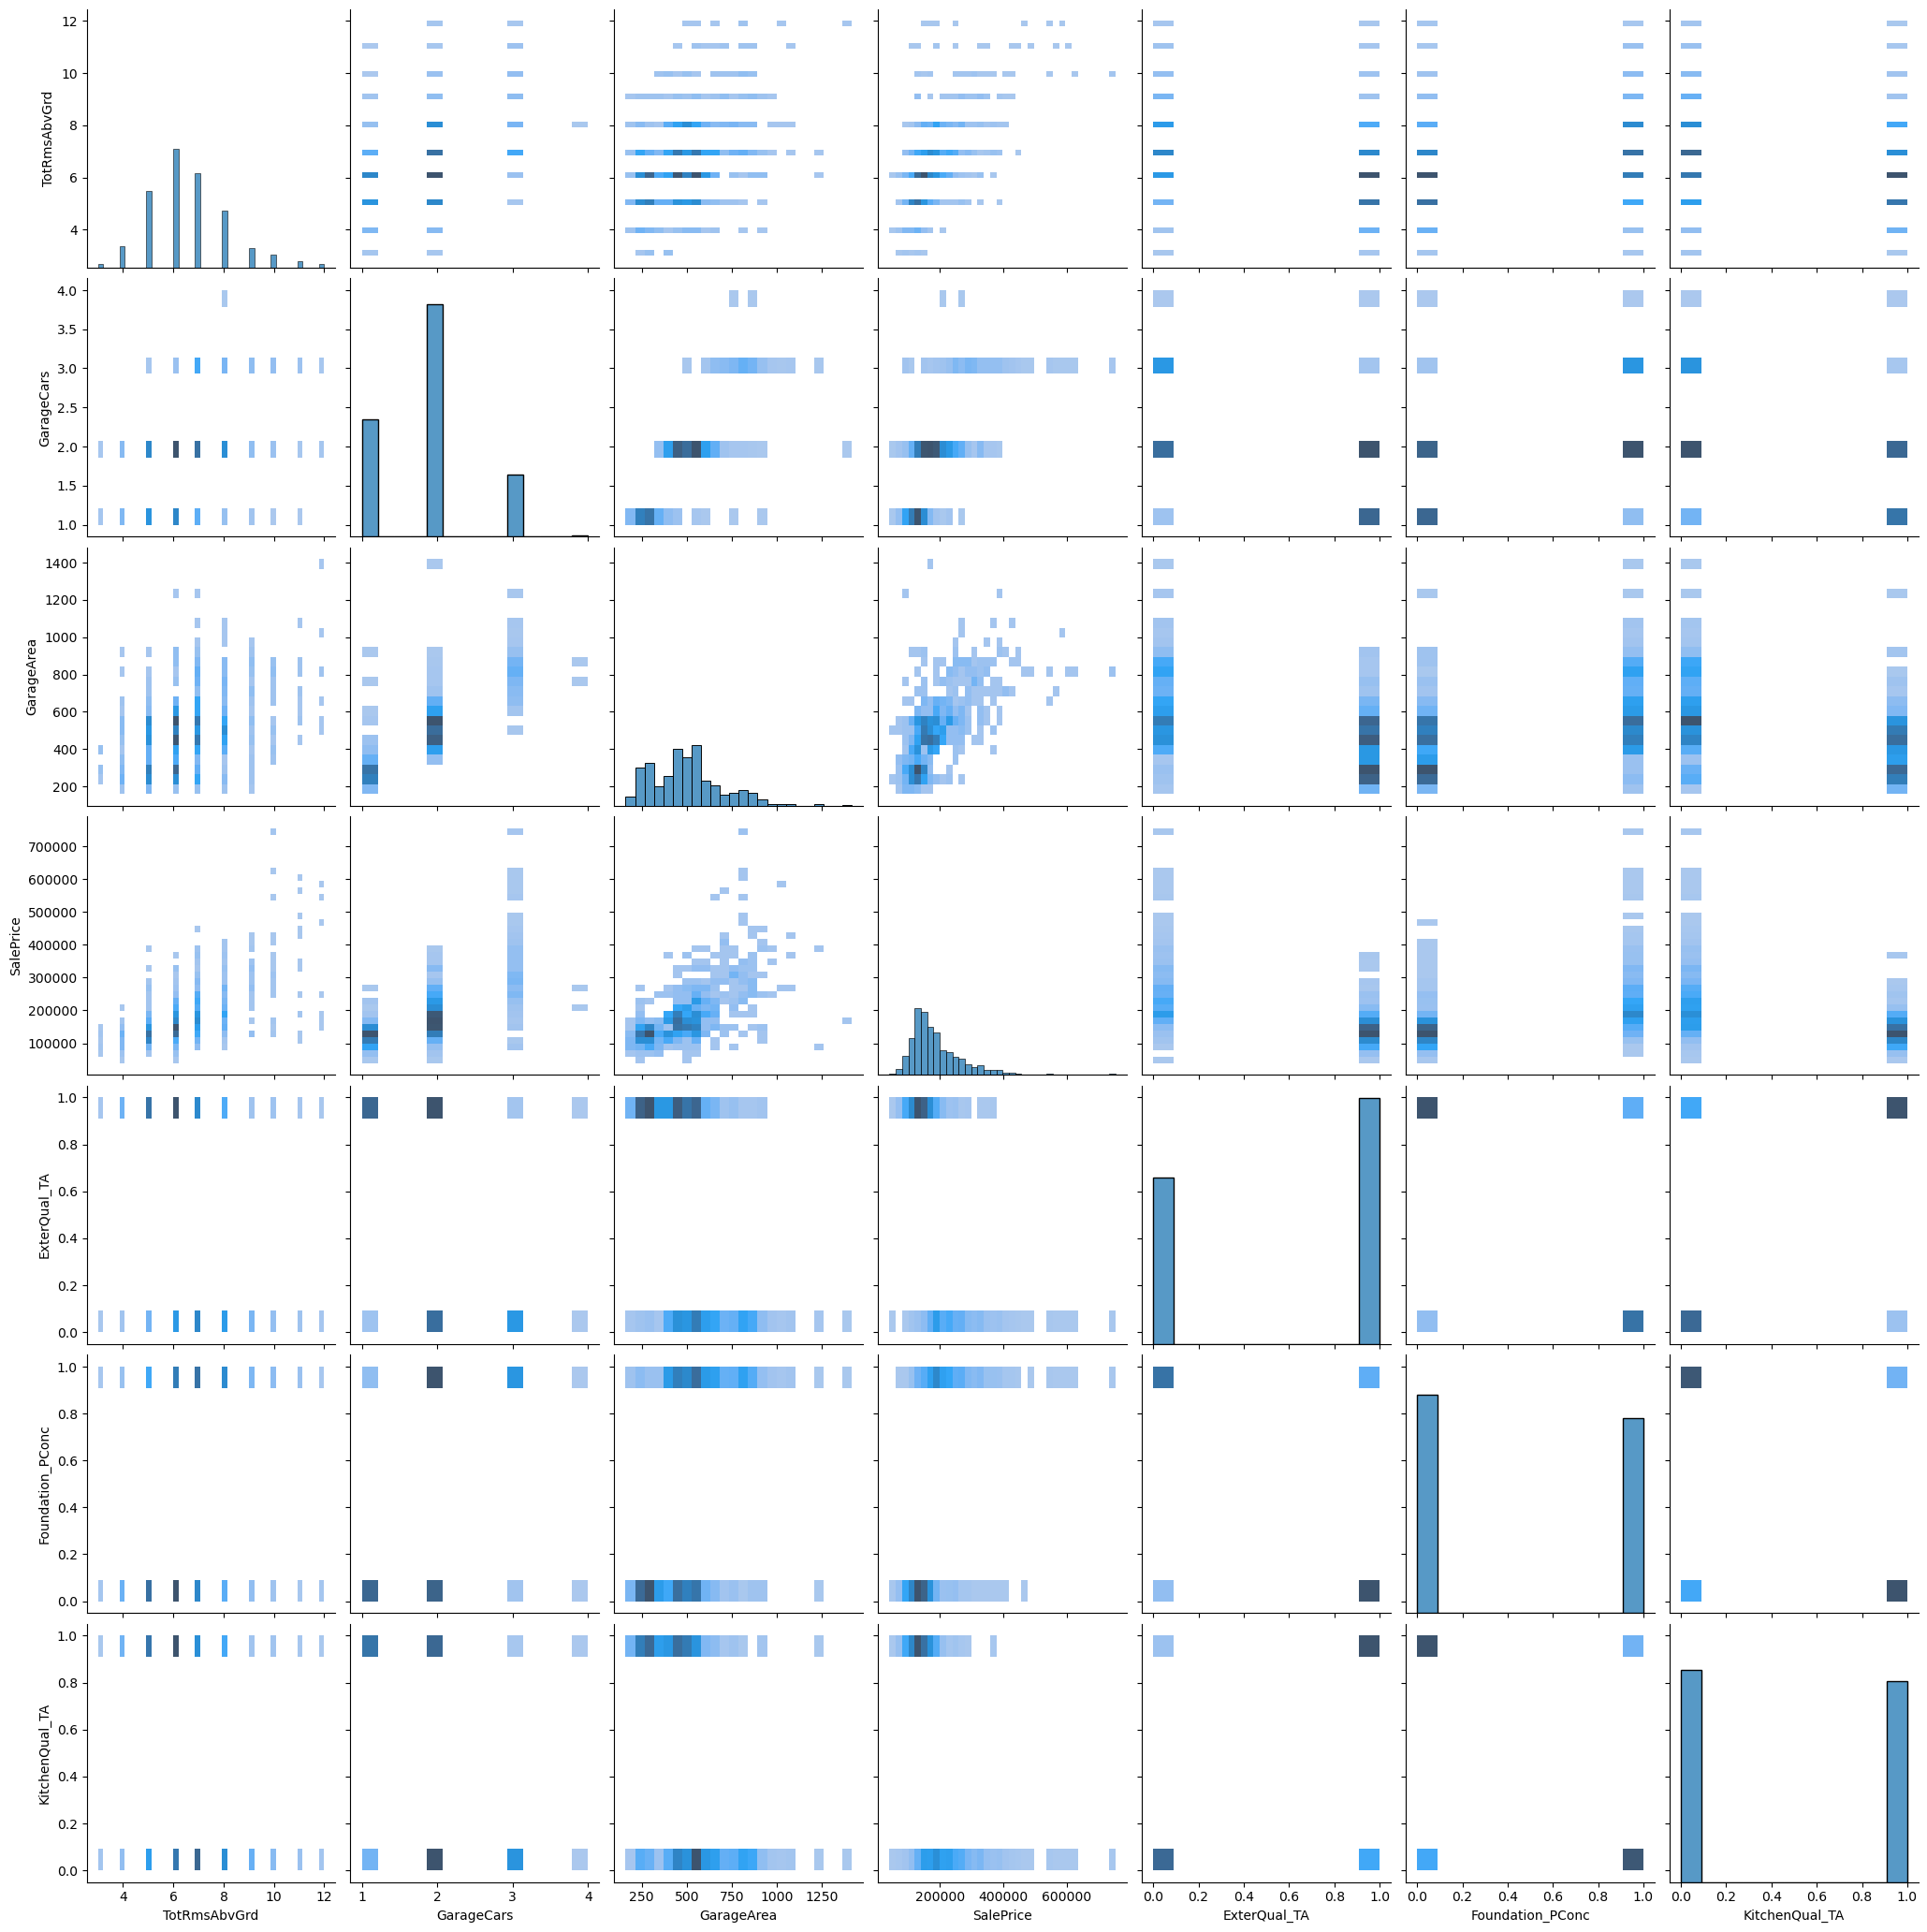

In [11]:
# sns pairplot histogram

plt.figure(figsize=(12,12))

sns.pairplot(data=df_train.iloc[:,7:], height=3, kind='hist')

plt.show()

##### Heatmap Correlation

Text(0.5, 1.0, 'Correlation')

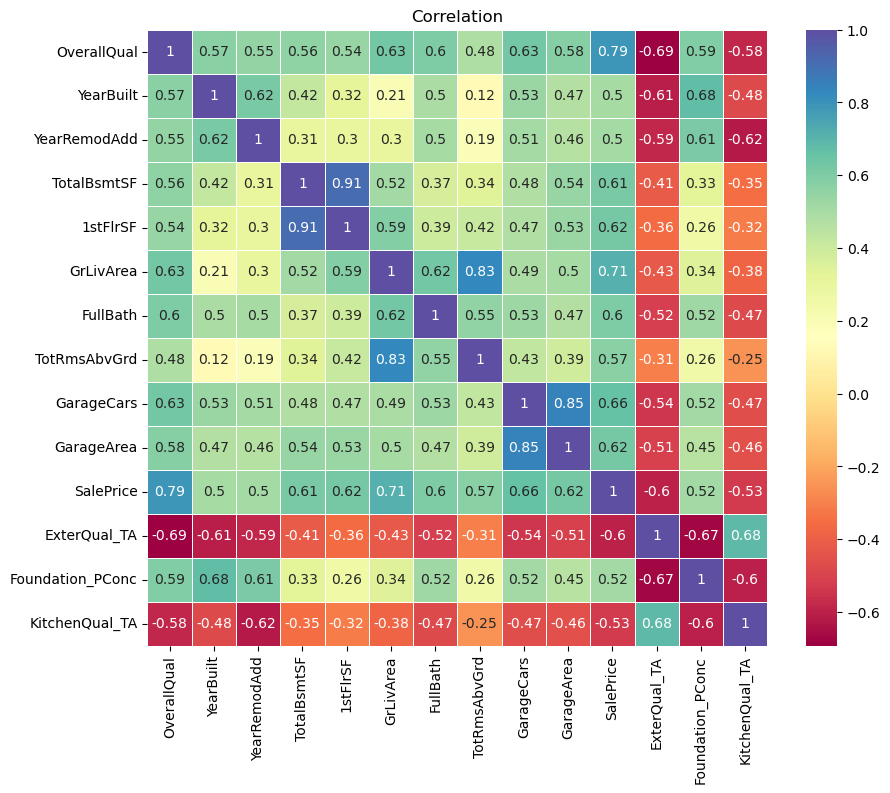

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df_train.corr(), annot=True, cmap='Spectral', linewidths=0.5)
plt.title("Correlation")

##### Correlation with Target

<Axes: >

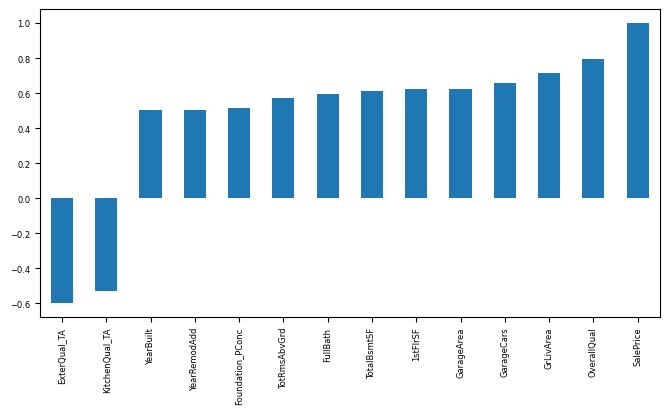

In [13]:
# Feature & Target correlation
df_train.corrwith(df_train['SalePrice']).sort_values().plot(kind='bar', figsize=(8,4),fontsize=6)

### **Data Preprocessing**
1.  Handling Outlier
2.  Edit data value

In [14]:
# preprocessing 
# remove outlier - important for linear regression, totalscore, basement, all numerical
# boxplot and remove outlier

# making beans on year that have distribution really awful

# one hot encodeing to categorical column 

##### Handling Outlier

In [15]:
print(df_train.columns)

df_train.head()

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA'],
      dtype='object')


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1
2,5,1910,2006,1022,1022,1022,1,4,1,280,85000,1,0,1
3,5,1973,1973,1656,1656,1656,2,8,2,506,135000,1,0,1
4,6,1978,1978,918,918,1683,2,7,2,440,172500,1,0,1


<Axes: ylabel='Frequency'>

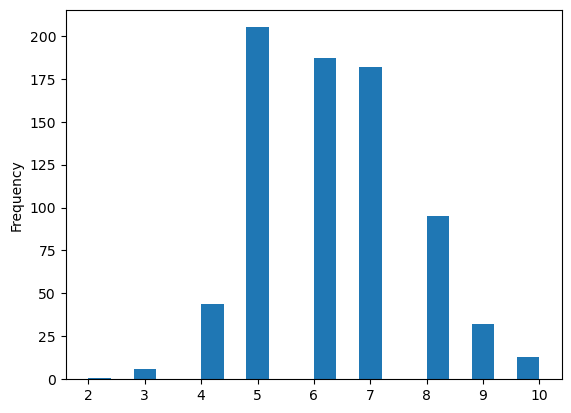

In [16]:
#1. OverallQual
df_train['OverallQual'].plot(kind='hist', bins=20)

In [17]:
#1. OverallQual outliers
df_train['OverallQual'] = df_train['OverallQual'].clip(lower=4, upper=9)
df_test['OverallQual'] = df_test['OverallQual'].clip(lower=4, upper=9)

df_train['OverallQual'].describe()

count    765.000000
mean       6.261438
std        1.316286
min        4.000000
25%        5.000000
50%        6.000000
75%        7.000000
max        9.000000
Name: OverallQual, dtype: float64

<Axes: ylabel='Frequency'>

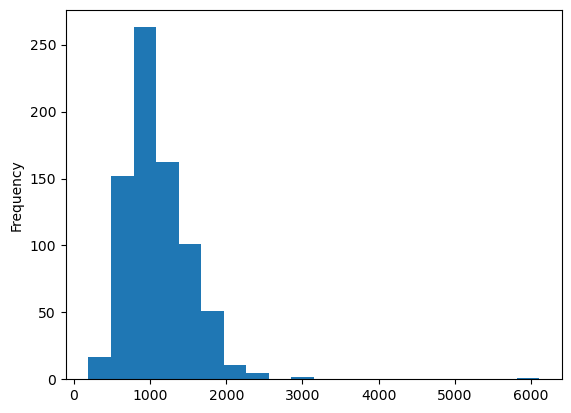

In [18]:
#2 TotalBsmtSF

df_train['TotalBsmtSF'].plot(kind='hist',bins=20)

In [19]:
#2 Column except YearBuilt and YearRemodadd

def remove_outliers(x, y, factor=1.5):
    for col in columns:
        q1 = x[col].quantile(0.25)
        q3 = x[col].quantile(0.75)
        IQR = q3-q1 

        lower = q1 - factor * IQR
        upper = q3 + factor * IQR 

        x[col] = x[col].clip(lower=lower, upper=upper)
    return x 


columns = ['OverallQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice', 'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_TA']

df_train = remove_outliers(df_train, columns) 
df_test = remove_outliers(df_test, columns)

##### Bucketize and Onehot

1. Column YearBuilt
2. Column YearRemodAdd

In [20]:
# YearBuilt

df_train['YearBuilt'] = pd.cut(df_train['YearBuilt'], bins=[1870,1940,1982,2020],labels=['1870-','1940-','1980-'])
df_test['YearBuilt'] = pd.cut(df_test['YearBuilt'], bins=[1870,1940,1982,2020],labels=['1870-','1940-','1980-'])

<Axes: xlabel='YearBuilt'>

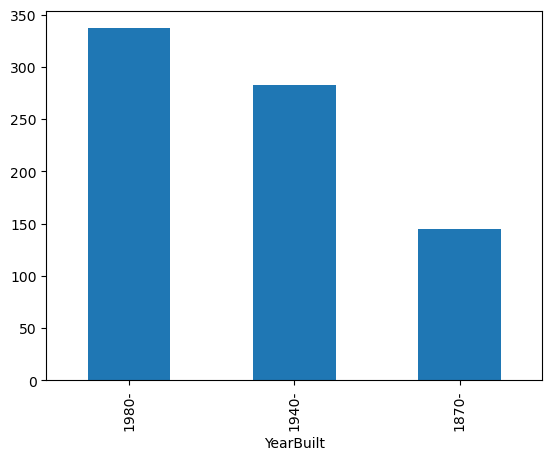

In [21]:
df_train['YearBuilt'].value_counts().plot(kind='bar')

In [22]:
#YearRemodAdd

df_train['YearRemodAdd'] = pd.cut(df_train['YearRemodAdd'], bins=[1950, 1960, 1970, 1980, 1990, 2000, 2020], labels=['50-60', '60-70', '70-80', '80-90', '90-00', '00-20'])
df_test['YearRemodAdd'] = pd.cut(df_test['YearRemodAdd'], bins=[1950, 1960, 1970, 1980, 1990, 2000, 2020], labels=['50-60', '60-70', '70-80', '80-90', '90-00', '00-20'])

<Axes: xlabel='YearRemodAdd'>

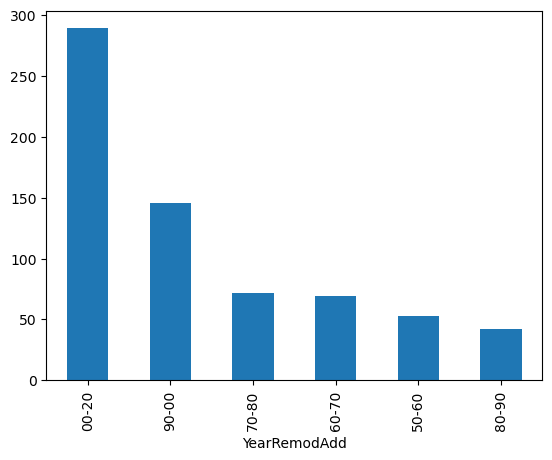

In [23]:
df_train['YearRemodAdd'].value_counts().plot(kind='bar')

In [24]:
# OnehotEncoding

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OverallQual       765 non-null    int64   
 1   YearBuilt         765 non-null    category
 2   YearRemodAdd      671 non-null    category
 3   TotalBsmtSF       765 non-null    int64   
 4   1stFlrSF          765 non-null    float64 
 5   GrLivArea         765 non-null    int64   
 6   FullBath          765 non-null    int64   
 7   TotRmsAbvGrd      765 non-null    float64 
 8   GarageCars        765 non-null    float64 
 9   GarageArea        765 non-null    float64 
 10  SalePrice         765 non-null    int64   
 11  ExterQual_TA      765 non-null    int64   
 12  Foundation_PConc  765 non-null    int64   
 13  KitchenQual_TA    765 non-null    int64   
dtypes: category(2), float64(4), int64(8)
memory usage: 73.7 KB


In [25]:
columns = ['YearBuilt','YearRemodAdd']

df_train = pd.get_dummies(df_train, columns=columns, drop_first=True)
df_test = pd.get_dummies(df_test, columns=columns, drop_first=True)


### **Modelling**

1. train-test-spllit (fetures, columns in train & test)
2. standardize
3. Fit model find score

##### Split Feautres & Target

In [26]:
# 1. Split target

# Split df_train
X_train = df_train.drop(columns='SalePrice')
y_train = df_train['SalePrice']

# Split df_test
X_test = df_test.drop(columns='SalePrice')
y_test = df_test['SalePrice']


##### Standardize

In [27]:
# 2. standardize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##### Modelling

In [31]:
import sklearn.linear_model as lm
for i in dir(lm):
    print(i)

ARDRegression
BayesianRidge
ElasticNet
ElasticNetCV
GammaRegressor
Hinge
Huber
HuberRegressor
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
Log
LogisticRegression
LogisticRegressionCV
ModifiedHuber
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PassiveAggressiveClassifier
PassiveAggressiveRegressor
Perceptron
PoissonRegressor
QuantileRegressor
RANSACRegressor
Ridge
RidgeCV
RidgeClassifier
RidgeClassifierCV
SGDClassifier
SGDOneClassSVM
SGDRegressor
SquaredLoss
TheilSenRegressor
TweedieRegressor
__all__
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__path__
__spec__
_base
_bayes
_cd_fast
_coordinate_descent
_glm
_huber
_least_angle
_linear_loss
_logistic
_omp
_passive_aggressive
_perceptron
_quantile
_ransac
_ridge
_sag
_sag_fast
_sgd_fast
_stochastic_gradient
_theil_sen
enet_path
lars_path
lars_path_gram
lasso_path
orthogonal_mp
orthogonal_mp_gram
ri

###### LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression

# Create a model
reg = LinearRegression().fit(X_train, y_train)

# See the score in train
scr_tr_reg = reg.score(X_train, y_train)

# See the score in test
scr_ts_reg = reg.score(X_test, y_test)

print(scr_tr_reg, scr_ts_reg)


0.8442031994457033 0.8375848774823128


###### Lasso

In [36]:
from sklearn.linear_model import Lasso 

# Create Model
lasso = Lasso().fit(X_train, y_train)

# See score
scr_tr_lasso = lasso.score(X_train, y_train)
scr_ts_lasso = lasso.score(X_test, y_test)

print(scr_tr_lasso,scr_ts_lasso)

0.8442031862827344 0.83757150554726


###### Ridge

In [37]:
# Ridge with alpha .2

from sklearn.linear_model import Ridge

# Create model
ridge = Ridge(alpha=.2).fit(X_train,y_train)

scr_tr_ridge = ridge.score(X_train,y_train)
scr_ts_ridge = ridge.score(X_test,y_test)

print(scr_tr_ridge,scr_ts_ridge)


0.8442030967221085 0.8375607151750089


###### ElasticNet

In [40]:
# ElasticNet wirh alpha .3 and l1_ration.6

from sklearn.linear_model import ElasticNet

# Create model
regr = ElasticNet(alpha=.3, l1_ratio=.6).fit(X_train,y_train)

scr_tr_regr = regr.score(X_train,y_train)
scr_ts_regr = regr.score(X_test,y_test)

scr_tr_regr,scr_ts_regr

(0.8384583629026772, 0.8246462651000458)

###### Ardregression

In [49]:
from sklearn.linear_model import ARDRegression

ard = ARDRegression().fit(X_train,y_train)

scr_tr_ard = ard.score(X_train,y_train)

scr_ts_ard = ard.score(X_test, y_test)

scr_ts_ard,scr_ts_ard

(0.8328386999668904, 0.8328386999668904)

###### SGDregressor

In [50]:
# SGD with penalty l2 | alpha .001 | l1_ratio .3

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(penalty='l2',
                   alpha=.001,
                   l1_ratio=.3).fit(X_train,y_train)

scr_tr_sgd = sgd.score(X_train,y_train)

scr_ts_sgd = sgd.score(X_test,y_test)

scr_tr_sgd, scr_ts_sgd

(0.8435032619020257, 0.8346474304242694)

###### model score

In [54]:
tr_scrs = [scr_tr_reg, scr_tr_lasso, scr_tr_ridge, scr_tr_regr, scr_tr_ard, scr_tr_sgd]
ts_scrs = [scr_ts_reg, scr_ts_lasso, scr_ts_ridge, scr_ts_regr, scr_ts_ard, scr_ts_sgd]
mdls = ['LinReg', 'Lasso', 'Ridge', 'ElasticNet','ARDreg', 'SGDRegressor']
dict_scrs = {'train score':tr_scrs, 'test score': ts_scrs}

model_score = pd.DataFrame(dict_scrs, index=mdls).sort_values('test score',ascending=False)
model_score

,train score,test score
LinReg,0.844203,0.837585
Lasso,0.844203,0.837572
Ridge,0.844203,0.837561
SGDRegressor,0.843503,0.834647
ARDreg,0.843457,0.832839
ElasticNet,0.838458,0.824646
